**Assessment Solution for Hamoye**

**Import the required modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read the data with pandas**

In [2]:
data = pd.read_csv('fuel_ferc1.csv',engine = 'python')

**Retrieve the information of the data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [4]:
A = [1,2,3,4,5,6]
B = [13,21,34]

In [5]:
C = A+B

In [6]:
print (C)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


**Retrieve the fuel type code from fuel_type_code_pudl**

In [7]:
data['fuel_type_code_pudl'].unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

**Create another dataframe that contains fuel_cost_per_unit_burned and fuel_type_code_pudl only**

In [8]:
data1 = data[['fuel_type_code_pudl','fuel_cost_per_unit_burned']]

In [9]:
data1.head()

,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,coal,18.59
1,coal,18.58
2,coal,39.72
3,coal,47.21
4,gas,2.77


**Calculate the mean of fuel_cost_per_unit_burned per fuel type to determine the lowest average. Fuel type gas has the lowest average of fuel cost per unit burned with average of 13.65**

In [10]:
data1[data1['fuel_type_code_pudl'] == 'coal'].mean()

fuel_cost_per_unit_burned    67.42183
dtype: float64

In [11]:
data1[data1['fuel_type_code_pudl'] == 'gas'].mean()

fuel_cost_per_unit_burned    13.659397
dtype: float64

In [12]:
data1[data1['fuel_type_code_pudl'] == 'nuclear'].mean()

fuel_cost_per_unit_burned    4955.157002
dtype: float64

In [13]:
data1[data1['fuel_type_code_pudl'] == 'oil'].mean()

fuel_cost_per_unit_burned    168.877086
dtype: float64

In [14]:
data1[data1['fuel_type_code_pudl'] == 'waste'].mean()

fuel_cost_per_unit_burned    19.518122
dtype: float64

In [15]:
data1[data1['fuel_type_code_pudl'] == 'other'].mean()

fuel_cost_per_unit_burned    18.253856
dtype: float64

**Retrieve the description of the data**

In [16]:
data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [17]:
data['fuel_qty_burned'] = data['fuel_qty_burned'].astype('float')

In [18]:
print (type(data['fuel_qty_burned']))

<class 'pandas.core.series.Series'>


**Calculate the kurtosis and skewness of qty of fuel burned, Frst we import the required module**

In [19]:
from scipy.stats import kurtosis,skew

In [20]:
kurtosis_fuel_burned = kurtosis(data['fuel_qty_burned'])

In [21]:
round(kurtosis_fuel_burned,2)

651.26

In [22]:
skewness_fuel_burned = skew(data['fuel_qty_burned'])

In [23]:
round(skewness_fuel_burned,2)

15.85

**Retrieve the null values in the data**

In [24]:
data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [25]:
most_missing = data.isnull().sum()['fuel_unit']

In [26]:
len(data)

29523

**Calculate the percentage of missing value**

In [28]:
missing_value_percent = most_missing/len(data)*100

In [30]:
round(missing_value_percent,4)

0.6097

*The correlation of data*

In [31]:
data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


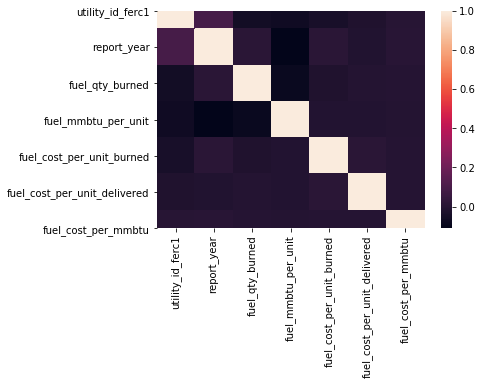

In [32]:
sns.heatmap(data.corr())

**Determine the year with the average of the most fuel_cost_per_unit_delivered, The year is 1997 with average of 11140.2**

In [33]:
data2 = data[['report_year', 'fuel_cost_per_unit_delivered']]

In [34]:
data2[data2['report_year'] == 2004].mean()

report_year                     2004.000000
fuel_cost_per_unit_delivered     139.524275
dtype: float64

In [35]:
data2[data2['report_year'] == 2018].mean()

report_year                     2018.000000
fuel_cost_per_unit_delivered     499.269966
dtype: float64

In [36]:
data2[data2['report_year'] == 1996].mean()

report_year                     1996.000000
fuel_cost_per_unit_delivered    9196.705948
dtype: float64

In [37]:
data2[data2['report_year'] == 1997].mean()

report_year                      1997.000000
fuel_cost_per_unit_delivered    11140.197239
dtype: float64

In [38]:
data2[data2['report_year'] == 2009].mean()

report_year                     2009.000000
fuel_cost_per_unit_delivered     652.694163
dtype: float64

In [39]:
data2.describe()

,report_year,fuel_cost_per_unit_delivered
count,29523.000000,2.952300e+04
mean,2005.806050,9.175704e+02
std,7.025483,6.877593e+04
min,1994.000000,-8.749370e+02
25%,2000.000000,3.778500e+00
50%,2006.000000,1.737100e+01
75%,2012.000000,4.213700e+01
max,2018.000000,7.964521e+06


**Percentage difference in the sum of coal is 1998 and 1994**

In [40]:
data4 = data[['report_year', 'fuel_type_code_pudl','fuel_cost_per_unit_burned']]

In [41]:
data4[(data4['report_year'] == 1994) & (data['fuel_type_code_pudl']=='coal')].sum()

report_year                                                             947150
fuel_type_code_pudl          coalcoalcoalcoalcoalcoalcoalcoalcoalcoalcoalco...
fuel_cost_per_unit_burned                                              14984.6
dtype: object

In [42]:
data4[(data4['report_year'] == 1998) & (data['fuel_type_code_pudl']=='coal')].sum()

report_year                                                             861138
fuel_type_code_pudl          coalcoalcoalcoalcoalcoalcoalcoalcoalcoalcoalco...
fuel_cost_per_unit_burned                                              11902.6
dtype: object

In [43]:
11902.6-14984.6

-3082.0

In [44]:
-3082/11902.6*100

-25.893502260010415